In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from kret_studies import *
from kret_studies.notebook_imports import *

In [3]:
features = ["Concentration", "Age", "Weight"]
y_col = ["Clearance"]
names_ordered = features + y_col
df = pd.read_csv("HW3.txt", sep=r"\s+", names=y_col + features, header=0)

In [4]:
df = df[names_ordered]

In [5]:
df.head(3)

,Concentration,Age,Weight,Clearance
0,0.71,38.0,71.0,132.0
1,1.48,78.0,69.0,53.0
2,2.21,69.0,85.0,50.0


### (a) Obtain the scatterplot matrix. What do the scatter plots suggest about the nature or the functional relationship between Y and the predictor variables?

In [6]:
fig, ax = uks_mpl.subplots(3)
uks_mpl.style_axes(fig, ax)

/Users/Akseldkw/coding/kretsinger/kret_studies/matplotlibutils.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


In [7]:
for i, col in enumerate(features):
    ax[i].scatter(df[col], df[y_col])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(y_col[0])
    ax[i].set_title(f"{col} vs {y_col[0]}")

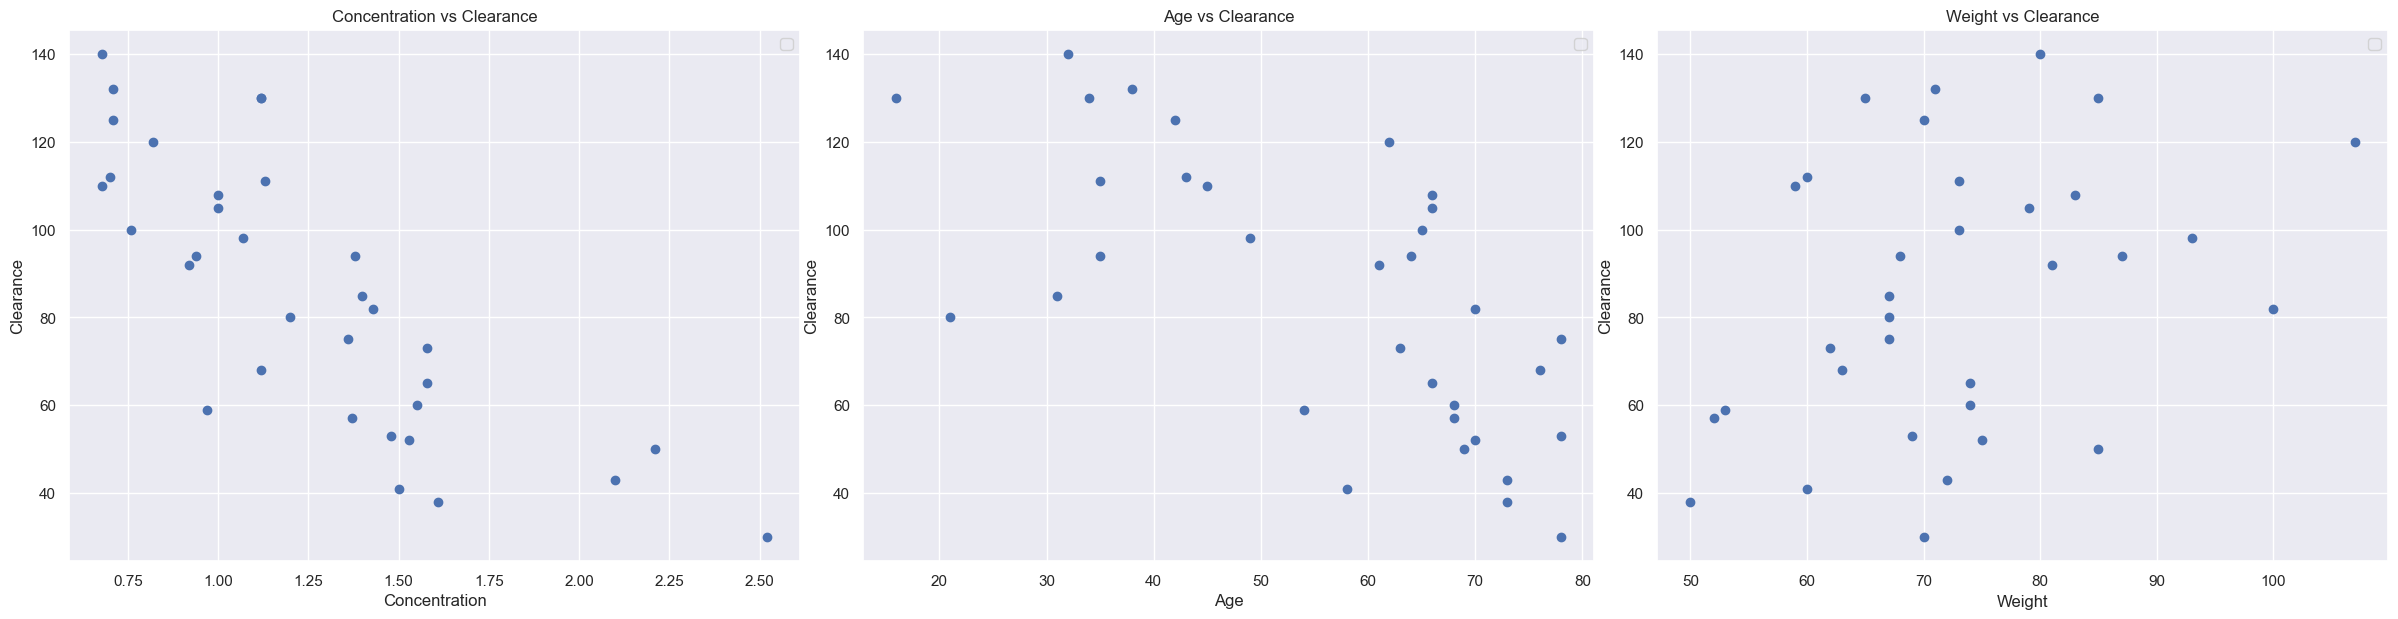

In [8]:
fig

I think that the concentration <--> clerance scatterplot has the tightest grouping. It's worth noting that the relationship doesn't appear to be linear (as in x^1 linear). I would eyeball that a simple a * x^-1 + b approximation, at least within the x & y bounds visible, would have a decent fit. 

Age and clearance appear to be less tightly related. My rough simplification of the relationship would be that age is non-predictive up until age 50, at which point it clearly trends downward. Maybe a -x^2 relationship would explain it decently 

Weight vs clearance is clearly positive (and probably linear), but with very high variance

### (b) Obtain the correlation matrix of the X variables Are any serious multicollinearity problems evident?

In [9]:
corr = df[features].corr()

In [10]:
corr2 = corr.copy(deep=True)
corr2.iloc[0, 1] = -0.87

In [11]:
corr

,Concentration,Age,Weight
Concentration,1.000000,0.467732,-0.088983
Age,0.467732,1.000000,0.068481
Weight,-0.088983,0.068481,1.000000


In [12]:
corr2

,Concentration,Age,Weight
Concentration,1.000000,-0.870000,-0.088983
Age,0.467732,1.000000,0.068481
Weight,-0.088983,0.068481,1.000000


In [88]:
fig, ax = uks_mpl.subplots(1)

In [89]:
_ = uks_mpl.heatmap_df(corr2, ax=ax)

'df_min=-0.87 df_max=1.0, abs_max=1.0'

{'vmin': -1.0,
 'vmax': 1.0,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1455fcd70>,
 'fmt': '.2f'}

{'annot': True,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1455fcd70>,
 'linewidths': 0.1,
 'cbar': True,
 'vmin': -1.0,
 'vmax': 1.0,
 'fmt': '.2f',
 'ax': <Axes: >}

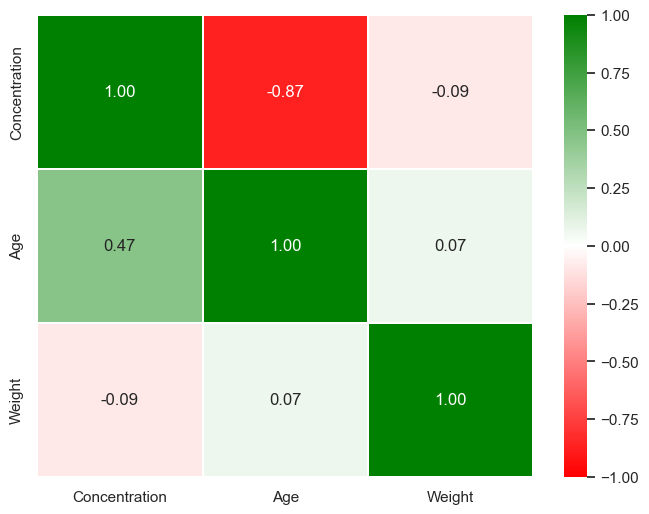

In [90]:
fig

In [91]:
fig, ax = uks_mpl.subplots(1)
_ = uks_mpl.heatmap_df(corr, ax=ax)

'df_min=-0.08898262373635779 df_max=1.0, abs_max=1.0'

{'vmin': -1.0,
 'vmax': 1.0,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1455fcd70>,
 'fmt': '.2f'}

{'annot': True,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1455fcd70>,
 'linewidths': 0.1,
 'cbar': True,
 'vmin': -1.0,
 'vmax': 1.0,
 'fmt': '.2f',
 'ax': <Axes: >}

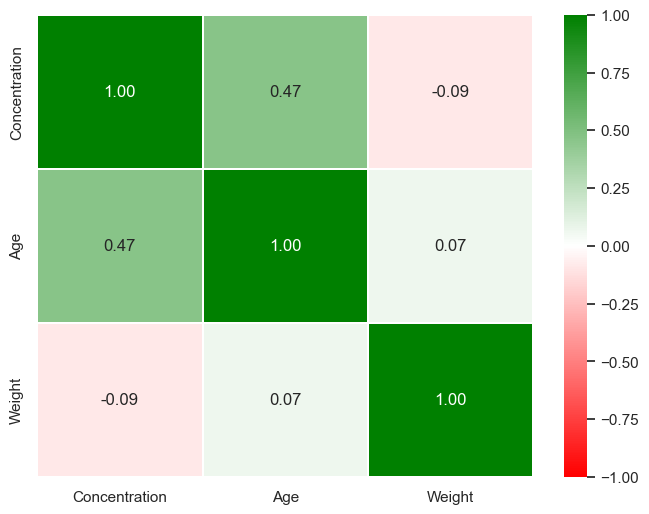

In [95]:
fig

'df_min=-7.48 df_max=0.0, abs_max=7.48'

{'vmin': -7.48,
 'vmax': 0,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1523b04d0>,
 'fmt': '.2f'}

{'annot': True,
 'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x1523b04d0>,
 'linewidths': 0.1,
 'cbar': True,
 'vmin': -7.48,
 'vmax': 0,
 'fmt': '.2f'}

<Axes: >

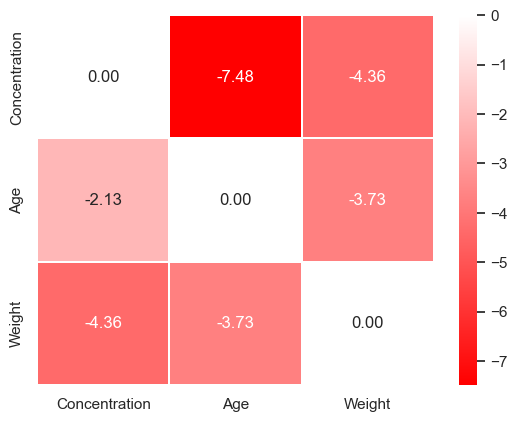

In [102]:
corr3 = (corr2 - 1) * 4
uks_mpl.heatmap_df(corr3)